In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [14]:
df=pd.read_csv("dataset.txt",header=None,sep="\s+")
X=df.drop(df.columns[2],axis=1).values.astype(float)
Y=df[df.columns[2]].values.astype(float).reshape(-1,1)
print(X,type(X),X.shape,Y.shape)

[[ 0.85 17.45]
 [ 0.75 15.6 ]
 [ 3.3  15.45]
 [ 5.25 14.2 ]
 [ 4.9  15.65]
 [ 5.35 15.85]
 [ 5.1  17.9 ]
 [ 4.6  18.25]
 [ 4.05 18.75]
 [ 3.4  19.7 ]
 [ 2.9  21.15]
 [ 3.1  21.85]
 [ 3.9  21.85]
 [ 4.4  20.05]
 [ 7.2  14.5 ]
 [ 7.65 16.5 ]
 [ 7.1  18.65]
 [ 7.05 19.9 ]
 [ 5.85 20.55]
 [ 5.5  21.8 ]
 [ 6.55 21.8 ]
 [ 6.05 22.3 ]
 [ 5.2  23.4 ]
 [ 4.55 23.9 ]
 [ 5.1  24.4 ]
 [ 8.1  26.35]
 [10.15 27.7 ]
 [ 9.75 25.5 ]
 [ 9.2  21.1 ]
 [11.2  22.8 ]
 [12.6  23.1 ]
 [13.25 23.5 ]
 [11.65 26.85]
 [12.45 27.55]
 [13.3  27.85]
 [13.7  27.75]
 [14.15 26.9 ]
 [14.05 26.55]
 [15.15 24.2 ]
 [15.2  24.75]
 [12.2  20.9 ]
 [12.15 21.45]
 [12.75 22.05]
 [13.15 21.85]
 [13.75 22.  ]
 [13.95 22.7 ]
 [14.4  22.65]
 [14.2  22.15]
 [14.1  21.75]
 [14.05 21.4 ]
 [17.2  24.8 ]
 [17.7  24.85]
 [17.55 25.2 ]
 [17.   26.85]
 [16.55 27.1 ]
 [19.15 25.35]
 [18.8  24.7 ]
 [21.4  25.85]
 [15.8  21.35]
 [16.6  21.15]
 [17.45 20.75]
 [18.   20.95]
 [18.25 20.2 ]
 [18.   22.3 ]
 [18.6  22.25]
 [19.2  21.95]
 [19.45 22

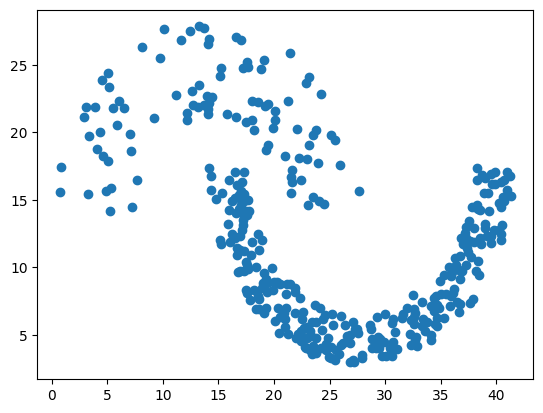

In [15]:
plt.scatter(X[:,0].reshape(-1,1),X[:,1].reshape(-1,1))
plt.show()

In [ ]:
class k_means:
    def __init__(self):
        self.partitions=None
        self.partition_means=None
        self.no_of_partitions=None
        self.x=None

    def random_initialization(self):
        self.partition_means=[]
        n,d=self.x.shape
        for i in range(self.no_of_partitions):
            mins=np.min(self.x,axis=0)
            maxs=np.max(self.x,axis=0)
            mean_i=[]
            for j in range(d):
                random_num=random.uniform(mins[j],maxs[j])
                mean_i.append(random_num)
            self.partition_means.append(mean_i)
        self.partition_means=np.array(self.partition_means)

    def partition_update(self):
        n,d=self.x.shape
        self.partitions=[[] for _ in range(self.no_of_partitions)]
        partitions_distances= np.linalg.norm(
        self.x[:, np.newaxis, :] - self.partition_means[np.newaxis, :, :], axis=2
        )
        for i in range(n):
            arg=np.argmin(partitions_distances[i])
            self.partitions[arg].append(i)
        for i in range(self.no_of_partitions):
            self.partition_means[i]=np.mean(self.x[self.partitions[i]],axis=0)

    def fit(self,x,p,updates):
        self.x=x
        self.no_of_partitions=p
        n,d=x.shape
        self.partitions = [[] for _ in range(self.no_of_partitions)]
        self.random_initialization()
        for i in range(updates):
            self.partition_update()
            print(f"Epoch {i+1}/{updates}")
            print("Current partition means:\n", self.partition_means)
            # Optional: print cluster sizes
            for k in range(self.no_of_partitions):
                print(f"Cluster {k+1} size: {len(self.partitions[k])}")
            print("-" * 40)
            
    def _2Dplot_for_two_partitions(self):
        plt.scatter(self.x[self.partitions[0],0],self.x[self.partitions[0],1],c='r')
        plt.scatter(self.x[self.partitions[1],0],self.x[self.partitions[1],1],c='g')
        plt.show()
    
    def performance(self):
        n,d=self.x.shape
        correctc1=np.sum(Y[self.partitions[0]]==2)
        correctc2=np.sum(Y[self.partitions[1]]==1)
        b=(correctc1+correctc2)/n
        a=1-b
        return (a+b+abs(a-b))/2

In [29]:
model=k_means()
model.fit(X,2,9)

Epoch 1/9
Current partition means:
 [[17.8559322  20.2809322 ]
 [27.32686275  8.38156863]]
Cluster 1 size: 118
Cluster 2 size: 255
----------------------------------------
Epoch 2/9
Current partition means:
 [[15.08273381 18.82769784]
 [29.8241453   8.17692308]]
Cluster 1 size: 139
Cluster 2 size: 234
----------------------------------------
Epoch 3/9
Current partition means:
 [[15.31217105 17.98585526]
 [30.53348416  8.12941176]]
Cluster 1 size: 152
Cluster 2 size: 221
----------------------------------------
Epoch 4/9
Current partition means:
 [[15.57253086 17.41759259]
 [31.0549763   8.0985782 ]]
Cluster 1 size: 162
Cluster 2 size: 211
----------------------------------------
Epoch 5/9
Current partition means:
 [[15.78106509 17.07514793]
 [31.41348039  8.0625    ]]
Cluster 1 size: 169
Cluster 2 size: 204
----------------------------------------
Epoch 6/9
Current partition means:
 [[15.89593023 16.96511628]
 [31.54850746  8.0221393 ]]
Cluster 1 size: 172
Cluster 2 size: 201
---------

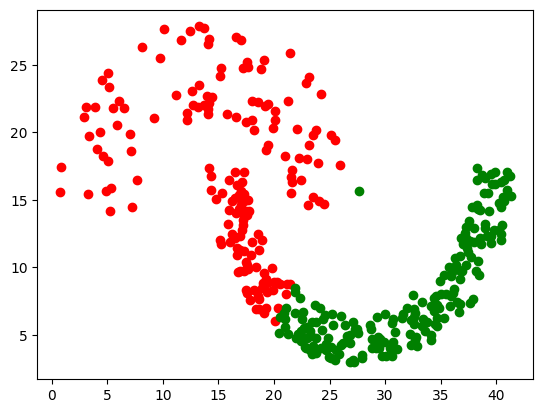

In [30]:
model._2Dplot_for_two_partitions()

In [31]:
model.performance()

0.7855227882037533